# Importing libraries


In [1]:
import pandas as pd
import plotly.graph_objects as go


# Load data


In [2]:
kickstarter_clean_df = pd.read_csv("./data/Part3.Team8.kickstarter_data_full_cleaned.csv", low_memory=False)

# Hypothesis 1: The goal amount and the pledged amount have influence on the success of the project


# Hypothesis 2: The number of backers have impact on the success of the project


### The model will answer both hypotheses


In [3]:
h1_h2_df = kickstarter_clean_df[
    [
        "backers_count",
        "usd_goal",  # normalized
        "usd_pledged",  # normalized
        "SuccessfulBool",
    ]
]

# Split to X and y


In [4]:
X = h1_h2_df.drop(columns="SuccessfulBool")
y = h1_h2_df["SuccessfulBool"]

# Split to train and test


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


# KNN


In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
knn = KNeighborsClassifier(n_neighbors=7)  # n_neighbors=7 is the optimal value


In [8]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [9]:
predictions_knn_train = knn.predict(X_train)
predictions_knn_test = knn.predict(X_test)

In [10]:
train_results_knn = pd.DataFrame(
    {"y_train": y_train, "predictions": knn.predict(X_train)}
)
test_results_knn = pd.DataFrame({"y_test": y_test, "predictions": knn.predict(X_test)})

In [11]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)


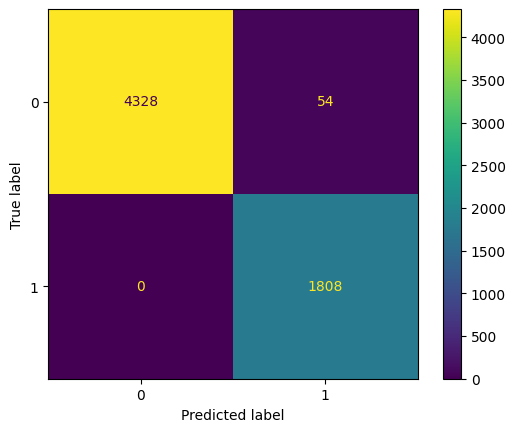

In [12]:
cm = confusion_matrix(y_test, predictions_knn_test, labels=[0, 1])
ConfusionMatrixDisplay(cm).plot()

In [13]:
print("classification report for knn with k=7 (train)")
print(classification_report(y_train, predictions_knn_train))
print("classification report for knn with k=7 (test)")
print(classification_report(y_test, predictions_knn_test))

classification report for knn with k=7 (train)
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     10232
           1       0.96      1.00      0.98      4210

    accuracy                           0.99     14442
   macro avg       0.98      0.99      0.99     14442
weighted avg       0.99      0.99      0.99     14442

classification report for knn with k=7 (test)
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4382
           1       0.97      1.00      0.99      1808

    accuracy                           0.99      6190
   macro avg       0.99      0.99      0.99      6190
weighted avg       0.99      0.99      0.99      6190



In [14]:
# auc score
from sklearn.metrics import roc_auc_score

print("auc score for knn with k=7 (train)")
print(roc_auc_score(y_train, predictions_knn_train))

auc score for knn with k=7 (train)
0.9914551990030811


### check for optimal k


In [15]:
l = []
for i in range(1, 201, 2):
    knni = KNeighborsClassifier(n_neighbors=i)
    knni.fit(X_train, y_train)
    predictions_knni_test = knni.predict(X_test)
    l.append((i, knni.score(X_test, y_test)))

In [16]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=[i[0] for i in l],
        y=[i[1] for i in l],
        mode="lines+markers",  # NOSONAR
        marker_color="rgb(171, 226, 251)",
    )
)
fig.update_layout(
    title="Accuracy vs K",
    title_x=0.5,
    width=800,
    height=800,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
)
fig.show()


# Logistic Reggression


In [17]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()

In [18]:
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [19]:
predictions_logistic_regression_train = logistic_regression.predict(X_train)
predictions_logistic_regression_test = logistic_regression.predict(X_test)

In [20]:
train_result_logistic_regression = pd.DataFrame(
    {"y_train": y_train, "predictions": predictions_logistic_regression_train}
)
test_result_logistic_regression = pd.DataFrame(
    {"y_test": y_test, "predictions": predictions_logistic_regression_test}
)

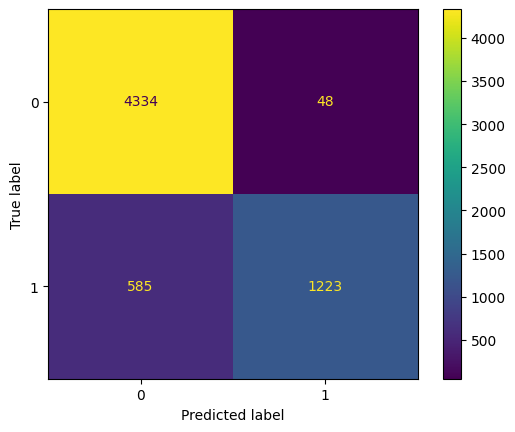

In [21]:
cm = confusion_matrix(y_test, predictions_logistic_regression_test)
ConfusionMatrixDisplay(cm).plot()

In [22]:
print("classification report for logistic regression (train)")
print(classification_report(y_train, predictions_logistic_regression_train))
print("classification report for logistic regression (test)")
print(classification_report(y_test, predictions_logistic_regression_test))

classification report for logistic regression (train)
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     10232
           1       0.96      0.66      0.78      4210

    accuracy                           0.89     14442
   macro avg       0.92      0.83      0.86     14442
weighted avg       0.90      0.89      0.89     14442

classification report for logistic regression (test)
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      4382
           1       0.96      0.68      0.79      1808

    accuracy                           0.90      6190
   macro avg       0.92      0.83      0.86      6190
weighted avg       0.90      0.90      0.89      6190



In [23]:
from sklearn.metrics import roc_curve, roc_auc_score

predictions_proba = logistic_regression.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, predictions_logistic_regression_test)
fpr, tpr, thresholds = roc_curve(y_test, predictions_proba[:, 1])

In [24]:
print("roc_auc_score: ", roc_auc)

roc_auc_score:  0.8327420753848206


In [25]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=fpr,
        y=tpr,
        mode="lines",
        name="ROC curve (area = %0.2f)" % roc_auc,
        line=dict(color="darkorange", width=2),
        text=thresholds,
        hovertemplate="fpr: %{x:.2f}<br>tpr: %{y:.2f}<br>threshold: %{text:.2f}",
    )
)
fig.add_trace(
    go.Scatter(
        x=[0, 1],
        y=[0, 1],
        mode="lines",
        name="Random guess",
        line=dict(color="navy", width=2, dash="dash"),
    )
)
fig.update_layout(
    title="Receiver Operating Characteristic",
    xaxis_title="False Positive Rate",
    yaxis_title="True Positive Rate",
)
fig.show()

### change the threshold to optimize the model (0.44)


In [26]:
predictions044 = [1 if x > 0.44 else 0 for x in predictions_proba[:, 1]]
test_results044 = pd.DataFrame({"y_test": y_test, "predictions": predictions044})

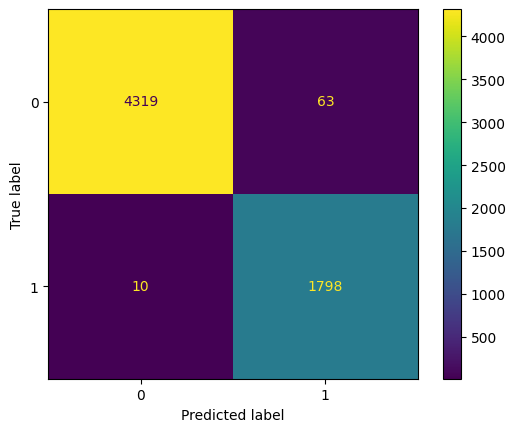

In [27]:
cm = confusion_matrix(y_test, predictions044)
ConfusionMatrixDisplay(cm).plot()

In [28]:
print(classification_report(y_test, predictions044))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4382
           1       0.97      0.99      0.98      1808

    accuracy                           0.99      6190
   macro avg       0.98      0.99      0.99      6190
weighted avg       0.99      0.99      0.99      6190



# Random forest


In [51]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(900, random_state=42, criterion="entropy")

In [52]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=900, random_state=42)

In [53]:
predictions_rf_train = rf.predict(X_train)
predictions_rf_test = rf.predict(X_test)

In [54]:
train_result_rf = pd.DataFrame(
    {"y_train": y_train, "predictions": predictions_rf_train}
)
test_result_rf = pd.DataFrame({"y_test": y_test, "predictions": predictions_rf_test})

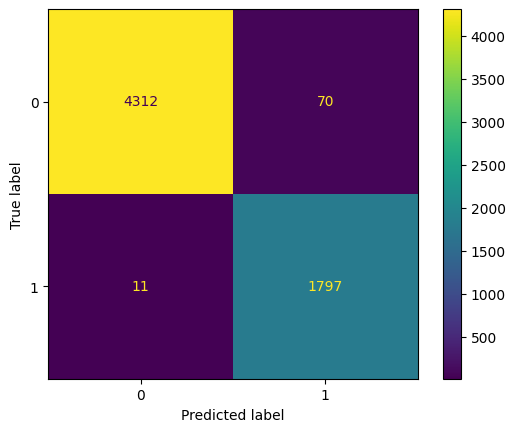

In [55]:
cm = confusion_matrix(y_test, predictions_rf_test)
ConfusionMatrixDisplay(cm).plot()

In [56]:
print("classification report for random forest (train)")
print(classification_report(y_train, predictions_rf_train))
print("classification report for random forest (test)")
print(classification_report(y_test, predictions_rf_test))

classification report for random forest (train)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10232
           1       1.00      1.00      1.00      4210

    accuracy                           1.00     14442
   macro avg       1.00      1.00      1.00     14442
weighted avg       1.00      1.00      1.00     14442

classification report for random forest (test)
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4382
           1       0.96      0.99      0.98      1808

    accuracy                           0.99      6190
   macro avg       0.98      0.99      0.98      6190
weighted avg       0.99      0.99      0.99      6190



### optimization of random forest to select the best parameters


In [35]:
l = []
for i in range(100, 1000, 100):
    print(i, end="\r")
    rfi = RandomForestClassifier(i, random_state=42, criterion="entropy")
    rfi.fit(X_train, y_train)
    predictions_rfi_test = rfi.predict(X_test)
    l.append((i, rfi.score(X_test, y_test)))

### plot accuracy vs n_estimators


In [36]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=[i[0] for i in l],
        y=[i[1] for i in l],
        mode="lines+markers",
        marker_color="rgb(171, 226, 251)",
    )
)
fig.update_layout(
    title="Accuracy vs n_estimators",
    title_x=0.5,
    width=800,
    height=800,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
)
fig.show()


# Decision tree


In [37]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42, criterion="entropy")

In [38]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [39]:
predictions_dt_train = dt.predict(X_train)
predictions_dt_test = dt.predict(X_test)

In [40]:
train_result_dt = pd.DataFrame(
    {"y_train": y_train, "predictions": predictions_dt_train}
)
test_result_dt = pd.DataFrame({"y_test": y_test, "predictions": predictions_dt_test})

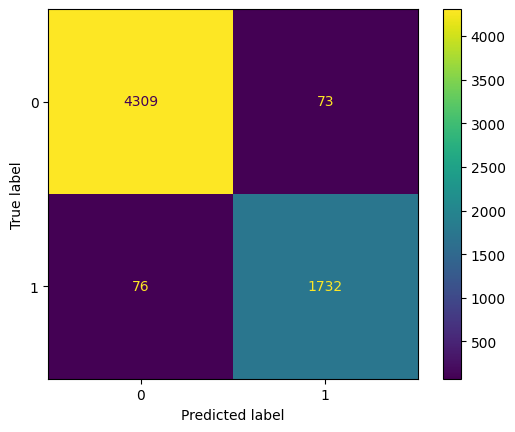

In [41]:
cm = confusion_matrix(y_test, predictions_dt_test)
ConfusionMatrixDisplay(cm).plot()

In [42]:
print("classification report for decision tree (train)")
print(classification_report(y_train, predictions_dt_train))
print("classification report for decision tree (test)")
print(classification_report(y_test, predictions_dt_test))

classification report for decision tree (train)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10232
           1       1.00      1.00      1.00      4210

    accuracy                           1.00     14442
   macro avg       1.00      1.00      1.00     14442
weighted avg       1.00      1.00      1.00     14442

classification report for decision tree (test)
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4382
           1       0.96      0.96      0.96      1808

    accuracy                           0.98      6190
   macro avg       0.97      0.97      0.97      6190
weighted avg       0.98      0.98      0.98      6190



### select best max_depth


In [43]:
l = []
for i in range(1, 20):
    print(i, end="\r")
    dti = DecisionTreeClassifier(random_state=42, criterion="entropy", max_depth=i)
    dti.fit(X_train, y_train)
    predictions_dt = dti.predict(X_test)
    l.append((i, dti.score(X_test, y_test)))

In [44]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=[i[0] for i in l],
        y=[i[1] for i in l],
        mode="lines+markers",
        marker_color="rgb(171, 226, 251)",
    )
)
fig.update_layout(
    title="Accuracy vs max_depth",
    title_x=0.5,
    width=800,
    height=800,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
)
fig.show()


In [45]:
dt_pruned = DecisionTreeClassifier(random_state=42, criterion="entropy", max_depth=10)

In [46]:
dt_pruned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [47]:
predictions_dt_pruned_train = dt_pruned.predict(X_train)
predictions_dt_pruned_test = dt_pruned.predict(X_test)

In [48]:
train_result_dt_pruned = pd.DataFrame(
    {"y_train": y_train, "predictions": predictions_dt_pruned_train}
)
test_result_dt_pruned = pd.DataFrame(
    {"y_test": y_test, "predictions": predictions_dt_pruned_test}
)

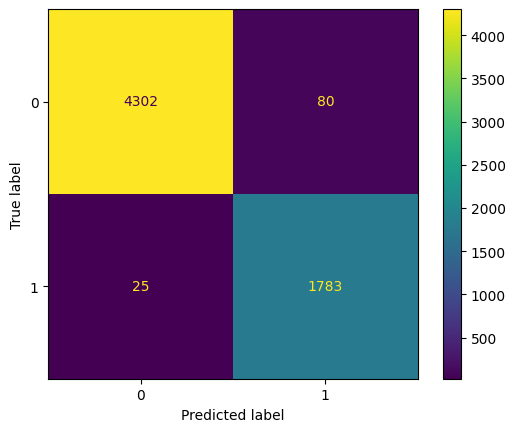

In [49]:
cm = confusion_matrix(y_test, predictions_dt_pruned_test)
ConfusionMatrixDisplay(cm).plot()

In [50]:
print("classification report for decision tree (train)")
print(classification_report(y_train, predictions_dt_pruned_train))
print("classification report for decision tree (test)")
print(classification_report(y_test, predictions_dt_pruned_test))

classification report for decision tree (train)
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     10232
           1       0.97      1.00      0.99      4210

    accuracy                           0.99     14442
   macro avg       0.99      0.99      0.99     14442
weighted avg       0.99      0.99      0.99     14442

classification report for decision tree (test)
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4382
           1       0.96      0.99      0.97      1808

    accuracy                           0.98      6190
   macro avg       0.98      0.98      0.98      6190
weighted avg       0.98      0.98      0.98      6190

